In [21]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback

In [22]:
num_classes = 0

In [23]:
def reinit(normalize = True):
    from keras.datasets import cifar10
    (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
    num_train, img_rows, img_cols,img_channels =  train_features.shape
    num_test, _, _, _ =  test_features.shape
    num_classes = len(np.unique(train_labels))
    if normalize:
        train_features = train_features.astype('float32')/255
        test_features = test_features.astype('float32')/255
        # convert class labels to binary class labels
        train_labels = np_utils.to_categorical(train_labels, num_classes)
        test_labels = np_utils.to_categorical(test_labels, num_classes)
    return (num_classes,train_features,train_labels,test_features,test_labels)

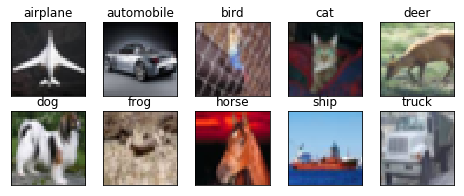

In [24]:

(num_classes,train_features,train_labels,test_features,test_labels) = reinit(False)
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [25]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [26]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [27]:
def modelDefine():    
    # Define the model
    model = Sequential()
    model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Convolution2D(48, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(96, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(96, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(192, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(192, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile the model    
    model.summary()
    return model

# Making the code work

W0803 13:52:01.721113 12608 deprecation_wrapper.py:119] From C:\Balaji\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
W0803 13:52:01.755079 12608 deprecation_wrapper.py:119] From C:\Balaji\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 13:52:01.823110 12608 deprecation_wrapper.py:119] From C:\Balaji\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D`

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Epoch 34/100
390/390 [==============================] - 8s 20ms/step - loss: 0.3711 - acc: 0.8740 - val_loss: 0.5833 - val_acc: 0.8256
Epoch 35/100
390/390 [==============================] - 8s 20ms/step - loss: 0.3672 - acc: 0.8748 - val_loss: 0.5614 - val_acc: 0.8230
Epoch 36/100
390/390 [==============================] - 8s 20ms/step - loss: 0.3714 - acc: 0.8750 - val_loss: 0.5778 - val_acc: 0.8222
Epoch 37/100
390/390 [==============================] - 8s 20ms/step - loss: 0.3625 - acc: 0.8774 - val_loss: 0.5590 - val_acc: 0.8252
Epoch 38/100
390/390 [==============================] - 8s 20ms/step - loss: 0.3452 - acc: 0.8820 - val_loss: 0.5900 - val_acc: 0.8201
Epoch 39/100
390/390 [==============================] - 8s 20ms/step - loss: 0.3593 - acc: 0.8786 - val_loss: 0.5699 - val_acc: 0.8274
Epoch 40/100
390/390 [==============================] - 8s 19ms/step - loss: 0.3529 - acc: 0.8820 - val_loss: 0.5692 - val_acc: 0.8209
Epoch 41/100
390/390 [==============================] -

Epoch 95/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2738 - acc: 0.9142 - val_loss: 0.5821 - val_acc: 0.8374
Epoch 96/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2562 - acc: 0.9195 - val_loss: 0.6022 - val_acc: 0.8342
Epoch 97/100
390/390 [==============================] - 8s 19ms/step - loss: 0.2571 - acc: 0.9191 - val_loss: 0.6174 - val_acc: 0.8386
Epoch 98/100
390/390 [==============================] - 8s 19ms/step - loss: 0.2672 - acc: 0.9179 - val_loss: 0.5712 - val_acc: 0.8397
Epoch 99/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2524 - acc: 0.9212 - val_loss: 0.6005 - val_acc: 0.8339
Epoch 100/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2593 - acc: 0.9182 - val_loss: 0.6448 - val_acc: 0.8253
Model took 772.52 seconds to train


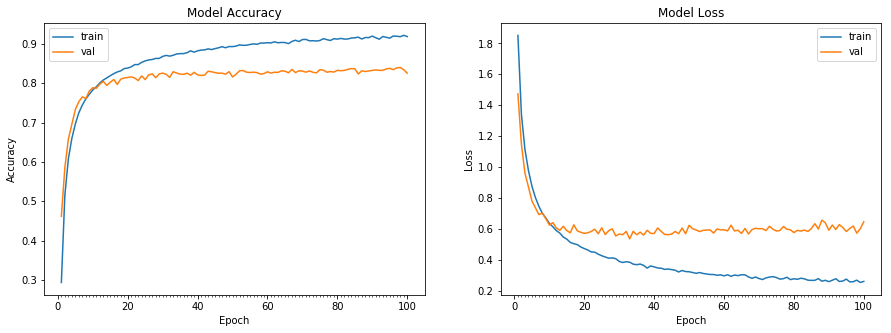

Accuracy on test data is: 82.53


In [29]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

(num_classes,train_features,train_labels,test_features,test_labels) = reinit()
model = modelDefine()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# After Adding cut out

In [30]:

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  if sys.path[0] == '':
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  app.launch_new_instance()
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:18:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)        41568     
__________

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  


Epoch 1/100
390/390 [==============================] - 9s 22ms/step - loss: 1.9271 - acc: 0.2537 - val_loss: 1.5800 - val_acc: 0.4084
Epoch 2/100
390/390 [==============================] - 8s 20ms/step - loss: 1.5260 - acc: 0.4393 - val_loss: 1.2268 - val_acc: 0.5556
Epoch 3/100
390/390 [==============================] - 8s 20ms/step - loss: 1.3296 - acc: 0.5239 - val_loss: 1.0708 - val_acc: 0.6163
Epoch 4/100
390/390 [==============================] - 8s 20ms/step - loss: 1.1845 - acc: 0.5766 - val_loss: 1.0230 - val_acc: 0.6382
Epoch 5/100
390/390 [==============================] - 8s 20ms/step - loss: 1.1050 - acc: 0.6116 - val_loss: 0.9135 - val_acc: 0.6796
Epoch 6/100
390/390 [==============================] - 8s 20ms/step - loss: 1.0271 - acc: 0.6385 - val_loss: 0.8491 - val_acc: 0.7012
Epoch 7/100
390/390 [==============================] - 8s 20ms/step - loss: 0.9705 - acc: 0.6642 - val_loss: 0.7672 - val_acc: 0.7344
Epoch 8/100
390/390 [==============================] - 8s 20ms

Epoch 62/100
390/390 [==============================] - 8s 19ms/step - loss: 0.5274 - acc: 0.8251 - val_loss: 0.5253 - val_acc: 0.8328
Epoch 63/100
390/390 [==============================] - 8s 19ms/step - loss: 0.5313 - acc: 0.8231 - val_loss: 0.5492 - val_acc: 0.8265
Epoch 64/100
390/390 [==============================] - 8s 20ms/step - loss: 0.5230 - acc: 0.8247 - val_loss: 0.5290 - val_acc: 0.8323
Epoch 65/100
390/390 [==============================] - 8s 20ms/step - loss: 0.5224 - acc: 0.8263 - val_loss: 0.5245 - val_acc: 0.8296
Epoch 66/100
390/390 [==============================] - 8s 20ms/step - loss: 0.5203 - acc: 0.8249 - val_loss: 0.5028 - val_acc: 0.8381
Epoch 67/100
390/390 [==============================] - 8s 20ms/step - loss: 0.5214 - acc: 0.8251 - val_loss: 0.5303 - val_acc: 0.8282
Epoch 68/100
390/390 [==============================] - 8s 19ms/step - loss: 0.5193 - acc: 0.8260 - val_loss: 0.5333 - val_acc: 0.8286
Epoch 69/100
390/390 [==============================] -

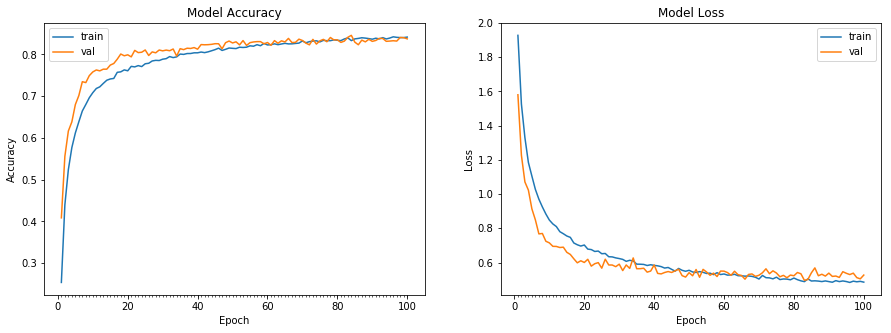

Accuracy on test data is: 83.70


In [32]:
from keras.preprocessing.image import ImageDataGenerator

(num_classes,train_features,train_labels,test_features,test_labels) = reinit()
model = modelDefine()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Use LR Finder to find the best starting learning rate

In [33]:
class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186

    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        newLR = self.min_lr + (self.max_lr-self.min_lr) * x       
        return newLR
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}                
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)            
        K.set_value(self.model.optimizer.lr, self.clr())
       
        

    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        plt.show()
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')
        plt.show()

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  if sys.path[0] == '':
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  app.launch_new_instance()
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:18:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_73 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_74 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 15, 15, 96)        41568     
__________

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<__main__..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 8s 21ms/step - loss: 2.3057 - acc: 0.0992 - val_loss: 2.3024 - val_acc: 0.0981
Epoch 2/100
390/390 [==============================] - 8s 20ms/step - loss: 2.3034 - acc: 0.1033 - val_loss: 2.3014 - val_acc: 0.1256
Epoch 3/100
390/390 [==============================] - 8s 20ms/step - loss: 2.3018 - acc: 0.1048 - val_loss: 2.3000 - val_acc: 0.1630
Epoch 4/100
390/390 [==============================] - 8s 20ms/step - loss: 2.3000 - acc: 0.1133 - val_loss: 2.2955 - val_acc: 0.2093
Epoch 5/100
390/390 [==============================] - 8s 20ms/step - loss: 2.2942 - acc: 0.1336 - val_loss: 2.2809 - val_acc: 0.2009
Epoch 6/100
390/390 [==============================] - 8s 20ms/step - loss: 2.2579 - acc: 0.1585 - val_loss: 2.1707 - val_acc: 0.1905
Epoch 7/100
390/390 [==============================] - 8s 20ms/step - loss: 2.1747 - acc: 0.1722 - val_loss: 2.0884 - val_acc: 0.2067
Epoch 8/100
390/390 [==============================] - 8s 20ms

Epoch 62/100
390/390 [==============================] - 8s 20ms/step - loss: 0.6348 - acc: 0.7835 - val_loss: 0.5393 - val_acc: 0.8207
Epoch 63/100
390/390 [==============================] - 8s 20ms/step - loss: 0.6222 - acc: 0.7878 - val_loss: 0.5415 - val_acc: 0.8169
Epoch 64/100
390/390 [==============================] - 8s 20ms/step - loss: 0.6109 - acc: 0.7912 - val_loss: 0.5888 - val_acc: 0.8045
Epoch 65/100
390/390 [==============================] - 8s 20ms/step - loss: 0.6046 - acc: 0.7924 - val_loss: 0.5242 - val_acc: 0.8222
Epoch 66/100
390/390 [==============================] - 8s 20ms/step - loss: 0.5960 - acc: 0.7950 - val_loss: 0.5208 - val_acc: 0.8255
Epoch 67/100
390/390 [==============================] - 8s 20ms/step - loss: 0.5788 - acc: 0.8043 - val_loss: 0.5195 - val_acc: 0.8269
Epoch 68/100
390/390 [==============================] - 8s 20ms/step - loss: 0.5706 - acc: 0.8058 - val_loss: 0.5191 - val_acc: 0.8263
Epoch 69/100
390/390 [==============================] -

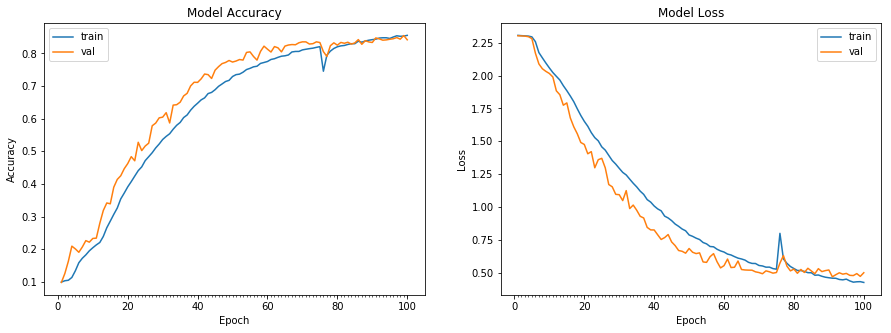

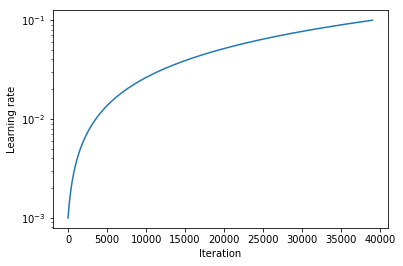

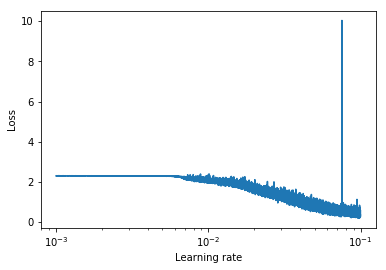

In [43]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
epoch_size = 100
batch_size = 128

(num_classes,train_features,train_labels,test_features,test_labels) = reinit()
model = modelDefine()
# Train the model
sgd = optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))
lr_finder = LRFinder(min_lr=0.001, max_lr=0.1, steps_per_epoch=np.ceil(50000/batch_size), epochs=epoch_size)
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = epoch_size, 
                                 validation_data = (test_features, test_labels), callbacks=[lr_finder],verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
lr_finder.plot_lr()
lr_finder.plot_loss()

# SDG with No Momentum

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  if sys.path[0] == '':
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  app.launch_new_instance()
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:18:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_81 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_82 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 15, 15, 96)        41568     
__________

Epoch 34/100
390/390 [==============================] - 7s 19ms/step - loss: 0.7429 - acc: 0.7457 - val_loss: 0.6219 - val_acc: 0.7870
Epoch 35/100
390/390 [==============================] - 7s 18ms/step - loss: 0.7329 - acc: 0.7494 - val_loss: 0.6160 - val_acc: 0.7893
Epoch 36/100
390/390 [==============================] - 7s 19ms/step - loss: 0.7192 - acc: 0.7529 - val_loss: 0.6076 - val_acc: 0.7913
Epoch 37/100
390/390 [==============================] - 7s 19ms/step - loss: 0.7004 - acc: 0.7621 - val_loss: 0.6377 - val_acc: 0.7836
Epoch 38/100
390/390 [==============================] - 7s 19ms/step - loss: 0.6912 - acc: 0.7629 - val_loss: 0.5972 - val_acc: 0.7954
Epoch 39/100
390/390 [==============================] - 7s 19ms/step - loss: 0.6755 - acc: 0.7705 - val_loss: 0.5997 - val_acc: 0.8021
Epoch 40/100
390/390 [==============================] - 7s 19ms/step - loss: 0.6560 - acc: 0.7757 - val_loss: 0.5825 - val_acc: 0.8033
Epoch 41/100
390/390 [==============================] -

390/390 [==============================] - 7s 19ms/step - loss: 0.3443 - acc: 0.8830 - val_loss: 0.5084 - val_acc: 0.8493
Epoch 95/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3453 - acc: 0.8823 - val_loss: 0.4981 - val_acc: 0.8487
Epoch 96/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3435 - acc: 0.8824 - val_loss: 0.4940 - val_acc: 0.8548
Epoch 97/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3310 - acc: 0.8869 - val_loss: 0.4985 - val_acc: 0.8453
Epoch 98/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3338 - acc: 0.8858 - val_loss: 0.5510 - val_acc: 0.8380
Epoch 99/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3275 - acc: 0.8890 - val_loss: 0.5244 - val_acc: 0.8449
Epoch 100/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3265 - acc: 0.8878 - val_loss: 0.5281 - val_acc: 0.8432


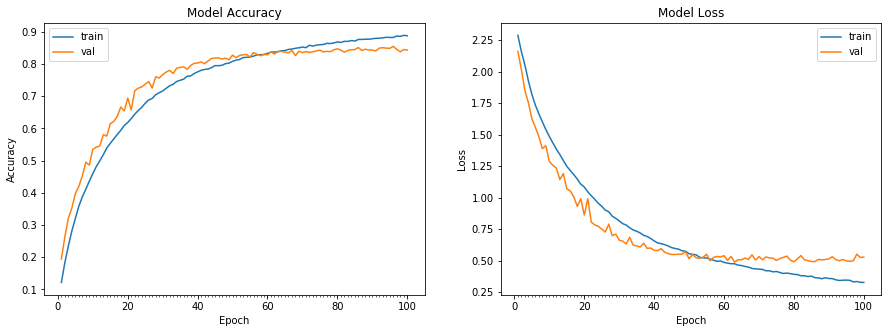

In [44]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
epoch_size = 100
batch_size = 128

(num_classes,train_features,train_labels,test_features,test_labels) = reinit()
model = modelDefine()
# Train the model
sgd = optimizers.SGD(lr=0.05, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))
# train the model
start = time.time()
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = epoch_size, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
# plot model history
plot_model_history(model_info)



 # SGD with Momentum and Keeping verbose to 0 

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  if sys.path[0] == '':
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  app.launch_new_instance()
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:18:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_89 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_90 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 15, 15, 96)        41568     
__________

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 8s 21ms/step - loss: 2.2561 - acc: 0.1421 - val_loss: 2.1097 - val_acc: 0.2447
Epoch 2/100
390/390 [==============================] - 7s 19ms/step - loss: 2.0939 - acc: 0.2162 - val_loss: 1.9254 - val_acc: 0.2849
Epoch 3/100
390/390 [==============================] - 7s 19ms/step - loss: 1.9106 - acc: 0.2853 - val_loss: 1.6348 - val_acc: 0.3854
Epoch 4/100
390/390 [==============================] - 7s 19ms/step - loss: 1.7464 - acc: 0.3469 - val_loss: 1.7339 - val_acc: 0.3836
Epoch 5/100
390/390 [==============================] - 7s 18ms/step - loss: 1.6296 - acc: 0.4021 - val_loss: 1.4158 - val_acc: 0.4804
Epoch 6/100
390/390 [==============================] - 7s 18ms/step - loss: 1.5234 - acc: 0.4441 - val_loss: 1.2861 - val_acc: 0.5395
Epoch 7/100
390/390 [==============================] - 7s 18ms/step - loss: 1.4437 - acc: 0.4766 - val_loss: 1.2020 - val_acc: 0.5660
Epoch 8/100
390/390 [==============================] - 7s 18ms

390/390 [==============================] - 7s 19ms/step - loss: 0.3947 - acc: 0.8669 - val_loss: 0.5038 - val_acc: 0.8460
Epoch 62/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3970 - acc: 0.8643 - val_loss: 0.4807 - val_acc: 0.8509
Epoch 63/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3858 - acc: 0.8683 - val_loss: 0.4782 - val_acc: 0.8499
Epoch 64/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3856 - acc: 0.8697 - val_loss: 0.5345 - val_acc: 0.8346
Epoch 65/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3902 - acc: 0.8662 - val_loss: 0.4999 - val_acc: 0.8449
Epoch 66/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3752 - acc: 0.8725 - val_loss: 0.4823 - val_acc: 0.8493
Epoch 67/100
390/390 [==============================] - 7s 19ms/step - loss: 0.3747 - acc: 0.8729 - val_loss: 0.4949 - val_acc: 0.8491
Epoch 68/100
390/390 [==============================] - 7s 18ms/step

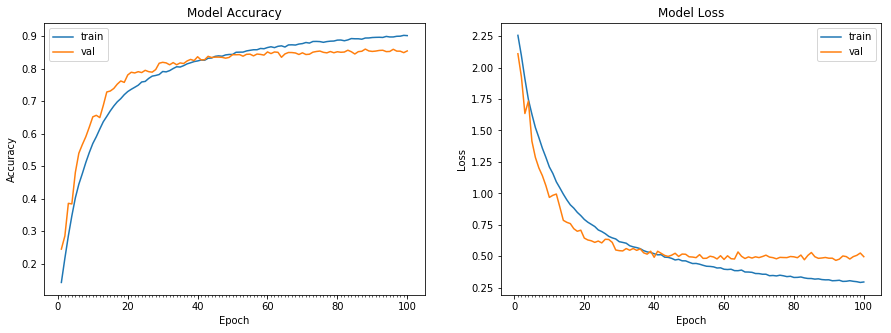

In [45]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
epoch_size = 100
batch_size = 128

(num_classes,train_features,train_labels,test_features,test_labels) = reinit()
model = modelDefine()
# Train the model
sgd = optimizers.SGD(lr=0.05, momentum=0.4, decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))
# train the model
start = time.time()
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = epoch_size, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
# plot model history
plot_model_history(model_info)


In [46]:
(num_classes,train_features,train_labels,test_features,test_labels) = reinit()
predicted = model.predict(train_features)  


In [47]:
print(predicted.shape)
print(train_labels.shape)

(50000, 10)
(50000, 10)


In [63]:
newPredict = np.zeros(predicted.shape)
for i in range(predicted.shape[0]):
    index = np.argmax(predicted[i])
    newPredict[i][index]=1
diff = np.subtract(newPredict,train_labels)
diff = np.absolute(diff)
diff = np.sum(diff,axis=1)
misClassifedImage = []
for i in range(diff.shape[0]):
    if diff[i] > 0:
        misClassifedImage.append(i)


In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_89 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_90 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 15, 15, 96)        41568     
__________

In [72]:

#import of the Grad Cam
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import cv2

def show_heatmap(index,model):
    sample = np.copy(train_x_features[index,::])
    x = np.copy(sample)    
    x = np.expand_dims(x, axis=0)
    x= preprocess_input(x)
    preds = model.predict(x)
    class_idx = np.argmax (preds[0])
    class_output = model.output[:,class_idx]
    last_conv_layer = model.get_layer("conv2d_69")
    grads = K.gradients(class_output,last_conv_layer.output )[0]
    pooled_grads = K.mean(grads,axis=(0,1,2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(96):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis = -1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (sample.shape[1], sample.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(sample, 0.5, heatmap, 0.5, 0)
    #from google.colab.patches import cv2_imshow
    #cv2_imshow( sample)
    #cv2_imshow(superimposed_img)
    #plt.imshow(sample)
    #plt.imshow(superimposed_img)
    #plt.show()
    return sample,superimposed_img

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


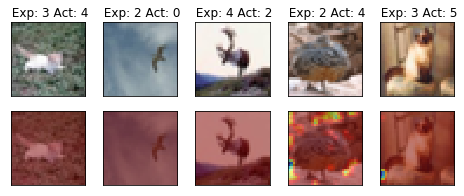

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


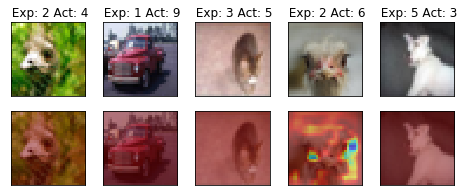

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


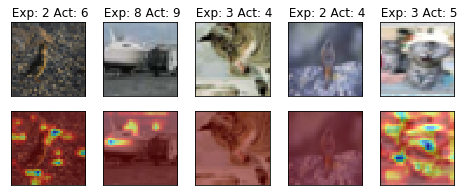

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


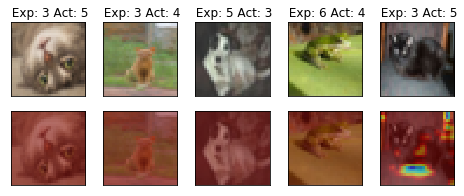

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


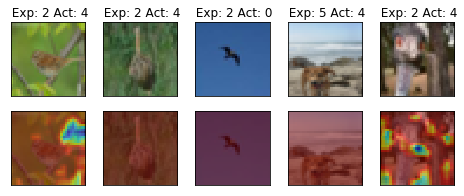

In [90]:
from keras.datasets import cifar10
(train_x_features, train_x_labels), (test_x_features, test_x_labels) = cifar10.load_data()
for count in range(5):    
    fig1 = plt.figure(figsize=(8,3))    
    counter = 0
    num = 5
    for randInt in misClassifedImage[count*5:num+count*5]:    
        (orig,heatmap) = show_heatmap(randInt,model)
        ax = fig1.add_subplot(2, num, 1 + counter, xticks=[], yticks=[])  
        act = str(np.argmax(newPredict[randInt]))
        exp = str(np.argmax(train_labels[randInt]))
        ax.set_title(" Exp: " + exp + " Act: " + act)
        plt.imshow(orig)      
        ax = fig1.add_subplot(2, num, 1 + counter + num, xticks=[], yticks=[])
        counter = counter+ 1
        plt.imshow(heatmap)    
        #plt.imshow(heatmap)      
    plt.show()